# **Analisis Pentingnya Kesetaraan Gender Berdasarkan Riset Hasil Uji Kompetensi**

#**Import Library**

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

#**Business Understanding**#

## **Business Objective**

Dalam Project Akhir Praktikum Penggalian dan Analisis Data ini, kami bertujuan untuk memahami bagaimana perbedaan perlakuan antara pria dan wanita dalam tes atau uji kompetensi dapat memengaruhi hasilnya. Hal ini penting untuk merancang kebijakan yang lebih adil dan mendukung kesetaraan gender dalam lingkup pekerjaan dan pendidikan. **Tujuan dari analisis** kami adalah untuk mendapatkan pemahaman yang lebih dalam tentang peran kesetaraan gender dalam hasil uji kompetensi serta potensi dampaknya terhadap individu, masyarakat, dan organisasi. Dengan demikian, kami berharap dapat memberikan kontribusi yang signifikan dalam memperjuangkan kesetaraan gender dan menciptakan lingkungan yang lebih inklusif.

## **Assess Situation**

Saat ini, masih banyak yang merasa bahwa hasil uji kompetensi tidak selalu adil bagi semua orang. Kadang-kadang, pria dan wanita diperlakukan berbeda dalam tes, yang bisa memengaruhi kesempatan mereka di tempat kerja atau di sekolah. Kami ingin mencari tahu mengapa hal ini terjadi dan bagaimana kita bisa membuatnya lebih adil.

## **Data Mining Goals**

Tujuan penggunaan data mining dalam analisis ini adalah pentingnya kesetaraan gender berdasarkan hasil uji kompetensi adalah untuk mengidentifikasi, menganalisis, dan memahami pola atau tren terkait kesetaraan gender dalam hasil uji kompetensi, dengan menggunakan menggunakan teknik dan algoritma analisis data untuk menggali informasi yang berharga dari dataset, yang kemudian dapat memberikan wawasan yang mendalam tentang isu kesetaraan gender dalam konteks evaluasi kinerja atau kompetensi.

## **Project Plan**

Kami akan memulai dengan mendefinisikan tujuan proyek, menetapkan lingkupnya, dan mengidentifikasi sumber data yang relevan. Kemudian, kami akan merencanakan dan mengumpulkan data, serta melakukan pemrosesan untuk persiapan analisis. Setelah data siap, kami akan menganalisis pola dan tren menggunakan alat analisis khusus untuk memahami peran kesetaraan gender dalam hasil uji kompetensi. Akhirnya, kami akan menyusun laporan dengan rekomendasi untuk menciptakan lingkungan yang lebih adil berdasarkan temuan kami.

#**Data Understanding**#

## **Collect Initial Data**

In [186]:
DATA_URL = "https://raw.githubusercontent.com/CAPSTONEDIGIPRODUCT-PDAB-TEAM4/CAPSTONEDIGIPRODUCT_PDAB_TEAM4/main/dataset.csv"

In [187]:
df = pd.read_csv(DATA_URL)
df.head()

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
0,1/11/2022,female,5,27.900,0,16884.92400,southwest,yes,19
1,1/11/2022,female,4,33.770,1,1725.55230,southeast,no,18
2,1/11/2022,male,8,33.000,3,4449.46200,southeast,no,28
3,1/11/2022,male,9,22.705,0,21984.47061,northwest,no,33
4,1/11/2022,female,4,28.880,0,3866.85520,northwest,no,32


Untuk melakukan analisis, kami mengambil sebuah dataset yang berasal dari kaggle.com yaitu "Male vs Female". Dataset "Male vs Female" berisi kumpulan informasi komprehensif yang bertujuan untuk memberikan wawasan tentang persamaan dan perbedaan antara perempuan dan laki-laki di berbagai domain. Kumpulan data ini telah dikurasi untuk memfasilitasi analisis dan eksplorasi karakteristik, sifat, preferensi, dan faktor lain yang mungkin berbeda antara kedua gender.

Berikut adalah link dataset yang kami gunakan: https://www.kaggle.com/datasets/moslemcapo/male-vs-female

##**Describe Data**

### **Informasi Dasar**

In [188]:
print("Jumlah baris dalam Dataset:", df.shape[0])
print("Jumlah kolom dalam Dataset:", df.shape[1])

Jumlah baris dalam Dataset: 354
Jumlah kolom dalam Dataset: 9


Berdasarkan output di atas, didapatkan bahwa terdapat 354 baris dan 9 kolom dalam dataset ini.

In [189]:
print("\nBaris Pertama Data:")
df.head()


Baris Pertama Data:


,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
0,1/11/2022,female,5,27.900,0,16884.92400,southwest,yes,19
1,1/11/2022,female,4,33.770,1,1725.55230,southeast,no,18
2,1/11/2022,male,8,33.000,3,4449.46200,southeast,no,28
3,1/11/2022,male,9,22.705,0,21984.47061,northwest,no,33
4,1/11/2022,female,4,28.880,0,3866.85520,northwest,no,32


In [190]:
print("\nBaris Terakhir Data:")
df.tail()


Baris Terakhir Data:


,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
349,8/11/2022,male,6,28.690,3,8059.67910,northwest,no,40
350,15/11/2022,female,1,36.955,2,47496.49445,northwest,yes,58
351,8/11/2022,male,2,31.825,2,13607.36875,northeast,no,58
352,15/11/2022,female,4,31.680,2,34303.16720,southeast,yes,18
353,9/12/2022,male,9,22.880,1,23244.79020,southeast,yes,53


In [191]:
df['Gender'].value_counts()

Gender
female    180
male      174
Name: count, dtype: int64

Berdasarkan hasil di atas, didapatkan bahwa terdapat 180 jumlah perempuan dan 174 laki-laki yang terdata pada dataset ini.

###**Informasi Lanjutan**

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 354 non-null    object 
 1   Gender               354 non-null    object 
 2   Driving test result  354 non-null    int64  
 3   Bmi                  354 non-null    float64
 4   Childeren            354 non-null    int64  
 5   Salary               354 non-null    float64
 6   region               354 non-null    object 
 7   smoker               354 non-null    object 
 8   age                  354 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 25.0+ KB


RangeIndex menunjukkan rentang indeks dari DataFrame, dari baris ke-0 hingga baris ke-353, dengan total 354 baris.
Dari hasil output dapat dilihat bahwa tidak ada nilai null dalam tiap kolom karena jumlah non-null count sama dengan jumlah total baris (354).
DataFrame terdiri dari 9 kolom dengan kombinasi tipe data berbeda: 2 kolom float64, 3 kolom int64, dan 4 kolom object.
Kolom 'Driving test result', 'Childeren', dan 'age' memiliki tipe data integer (int64), sedangkan kolom 'Bmi' dan 'Salary' memiliki tipe data float (float64). Berikut adalah penjelasan mengenai kolom yang terdapat pada dataset ini:


1.   **Date**: Kolom ini menyimpan tanggal pengumpulan data pada dataset ini.
2.   **Gender**: Kolom ini berisi informasi tentang jenis kelamin individu.
3. **Driving test result**: Kolom ini mungkin berisi hasil dari ujian mengemudi yang telah dilakukan oleh individu yang direpresentasikan dalam bentuk skor.
4. **BMI**: Kolom ini berisi indeks massa tubuh (BMI) dari individu, yang merupakan ukuran relatif dari berat badan dan tinggi badan. Ini dapat digunakan untuk mengevaluasi apakah seseorang memiliki berat badan normal, berat badan kurang, kelebihan berat badan, atau obesitas.
5. **Children**: Kolom ini berisi jumlah anak yang dimiliki oleh individu.
6. **Salary**: Kolom ini berisi informasi tentang gaji atau pendapatan individu.
7. **Region**: Kolom ini berisi informasi tentang wilayah geografis di mana individu tinggal atau bekerja. Ini berupa wilayah geografis seperti "Northeast", "Northwest", "Southeast", dan "Southwest".
8. **Smoker**: Kolom ini berisi informasi apakah individu adalah perokok atau bukan, mungkin direpresentasikan dalam bentuk yes or no.
9. **Age**: Kolom ini berisi informasi tentang usia individu dalam tahun.





###**Informasi Statistik Deskriptif**

**Data Numerik**

In [193]:
df.describe()

,Driving test result,Bmi,Childeren,Salary,age
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5.677966,30.936780,0.949153,15389.764575,37.186441
std,3.054411,5.647635,1.127916,14498.788568,15.277017
min,1.000000,17.385000,0.000000,1137.011000,18.000000
25%,2.000000,26.315000,0.000000,3579.828700,23.000000
50%,6.000000,31.825000,1.000000,10602.385000,34.000000
75%,9.000000,35.600000,2.000000,23568.272000,55.000000
max,10.000000,42.130000,5.000000,51194.559140,63.000000


Dalam dataset ini terdapat 5 kolom numerik, diantaranya adalah kolom Driving test result, BMI, Children, Salary, dan Age. Berdasarkan hasil diatas, dapat diketahui jumlah nilai (count), jumlah rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai percentile (terbagi menjadi tiga, yaitu 25%, 50%, dan 75%), dan nilai maksimum (max) yang dijabarkan pada tiap kolom numerik yang ada dalam dataset. Berikut penjelasannya:
1. **Driving test result**: nilai count	adalah 354.000000, nilai mean adalah	5.677966, nilai std adalah 3.054411, nilai min adalah	1.000000, nilai 25% nya adalah	2.000000, nilai 50% nya adalah	6.000000, nilai 75% nya adalah	9.000000, dan nilai max	adalah 10.000000.
2. **BMI**: nilai count	adalah 354.000000, nilai mean adalah	30.936780, nilai std adalah 5.647635, nilai min adalah	17.385000, nilai 25% nya adalah	26.315000, nilai 50% nya adalah	31.825000, nilai 75% nya adalah	35.600000, dan nilai max	adalah 42.130000.
3. **Children**: nilai count	adalah 354.000000, nilai mean adalah	0.949153, nilai std adalah 1.127916, nilai min adalah	0.000000, nilai 25% nya adalah	0.000000, nilai 50% nya adalah	1.000000, nilai 75% nya adalah	2.000000, dan nilai max	adalah 5.000000.
4. **Salary**: nilai count	adalah 354.000000, nilai mean adalah	15389.764575, nilai std adalah 14498.788568, nilai min adalah	1137.011000, nilai 25% nya adalah	3579.828700, nilai 50% nya adalah	10602.385000, nilai 75% nya adalah	23568.272000, dan nilai max	adalah 51194.559140.
5. **Age**: nilai count	adalah 354.000000, nilai mean adalah	37.186441, nilai std adalah 15.277017, nilai min adalah	18.000000, nilai 25% nya adalah	23.000000, nilai 50% nya adalah	34.000000, nilai 75% nya adalah	55.000000, dan nilai max	adalah 63.000000.

**Data Kategorikal**

In [194]:
df.describe(exclude = np.number)

,Date,Gender,region,smoker
count,354,354,354,354
unique,11,2,4,2
top,15/11/2022,female,southeast,no
freq,78,180,102,258


Dalam dataset ini terdapat 4 kolom kategorikal, diantaranya adalah kolom Date, Gender, Region, dan Smoker. Berdasarkan hasil diatas, dapat diketahui jumlah nilai (count), jumlah nilai unik (unique), nilai yang sering muncul (top), dan banyaknya nilai top tersebut muncul (freq) yang dijabarkan pada tiap kolom kategorikal yang ada dalam dataset. Berikut penjelasannya:
1. **Date**: nilai count	adalah 354, nilai unique adalah	11, nilai top adalah 15/11/2022, dan nilai freq adalah	78.
2. **Gender**: nilai count	adalah 354, nilai unique adalah	2, nilai top adalah female, dan nilai freq adalah	180.
3. **Region**: nilai count	adalah 354, nilai unique adalah	4, nilai top adalah southeast, dan nilai freq adalah	102.
4. **Smoker**: nilai count	adalah 354, nilai unique adalah	2, nilai top adalah no, dan nilai freq adalah	258.


##**Exploratory Data Analysis (EDA)**

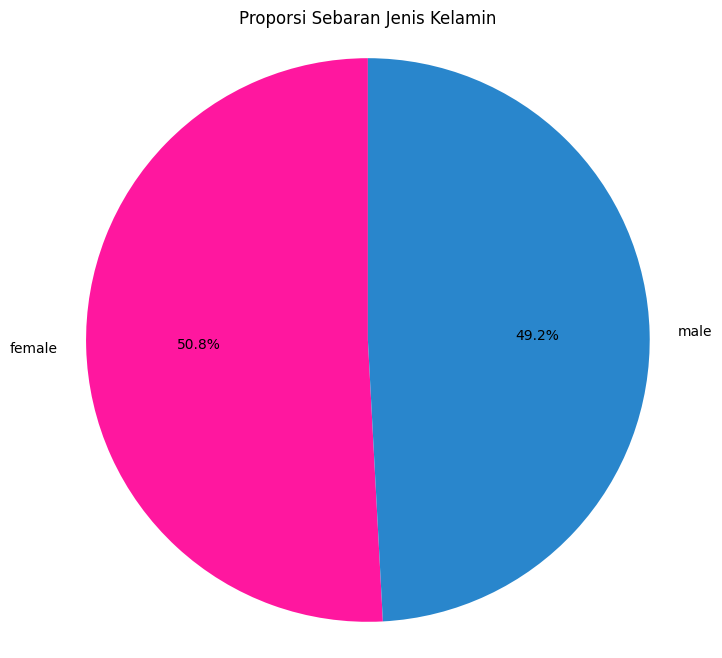

In [195]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
colors = ['#ff179f', '#2986cc']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Sebaran Jenis Kelamin')
plt.axis('equal')
plt.show()

Diagram lingkaran (pie chart) ini menunjukkan proporsi jumlah pria dan wanita yang disajikan dalam grafik melingkar. Yang dimana 50.8% adalah wanita dan 49.2% adalah pria.

Text(0.5, 1.0, 'Region')

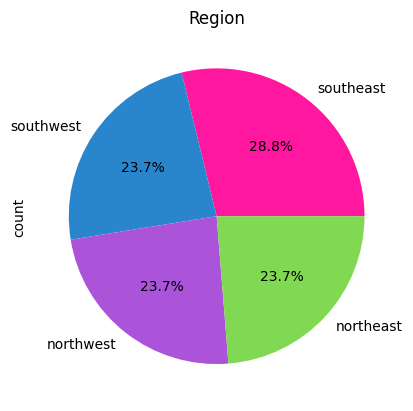

In [196]:
colors = ['#ff179f', '#2986cc', '#ab53d9', '#81d953']

visual_region = df['region'].value_counts()
visual_region.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Region')

Diagram ini menunjukkan persentase penduduk yang tinggal di setiap wilayah Amerika Serikat yang tebagi menjadi empat bagian.

*   Tenggara (Southeast) merupakan bagian populasi terbesar dalam diagram, yang mewakili 28.8% populasi
*   Timur laut (Northeast), Barat laut (Northwest), Barat daya (Southwest) memiliki jumlah populasi yang sama banyaknya dalam diagram, yang mewakili 23.7% populasi.



Text(0.5, 1.0, 'Smoker')

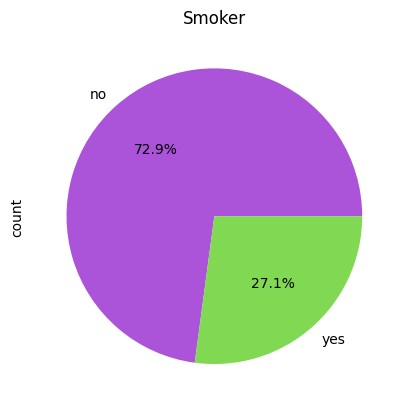

In [197]:
colors = ['#ab53d9', '#81d953']

visual_smoker = df['smoker'].value_counts()
visual_smoker.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Smoker')

Diagram ini menunjukkan persentase orang yang merokok di Amerika Serikat. Bagian diagram yang lebih besar menunjukkan jumlah orang-orang yang tidak merokok, yang mewakili 72.9% populasi. Sedangkan diagram yang lebih kecil merupakan jumlah orang-orang yang merokok, yang mewakili 27.1% populasi. Jadi dapat dilihat bahwa mayoritas penduduk Amerika Serikat tidak merokok.

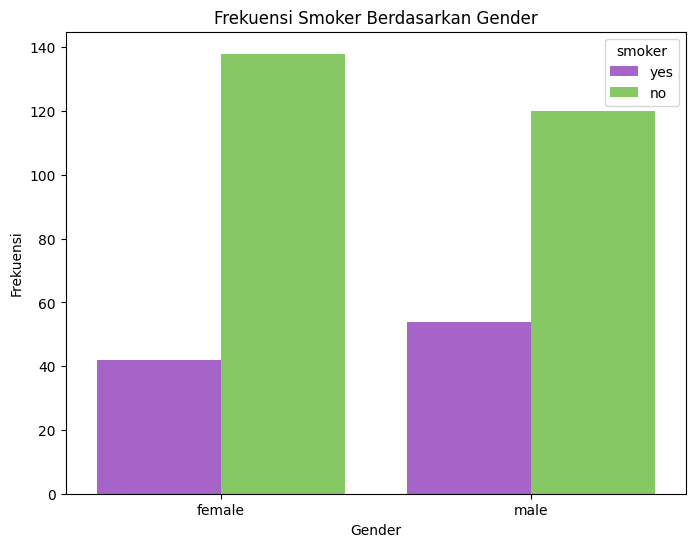

In [198]:
colors = ['#ab53d9', '#81d953']
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='smoker', data=df, palette=colors)
plt.title('Frekuensi Smoker Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.show()

Grafik batang ini menunjukkan frekuensi perokok berdasarkan gender di suatu populasi, dapat dibagi menjadi dua batang, satu untuk perempuan dan satu untuk laki-laki.
Pada grafik batang perempuan dapat dilihat bahwa yang tidak merokok lebih banyak daripada yang merokok. Begitu juga pada grafik batang pria lebih dominan yang tidak merokok daripada peroko.
Jadi dapat disimpulkan bahwa terdapat perbedaan yang kecil antara frekuensi tidak merokok perempuan dan laki-laki. Perempuan sedikit lebih banyak tidak merokok daripada laki-laki, dengan persentase 50.8% dibandingkan dengan 49.2%.


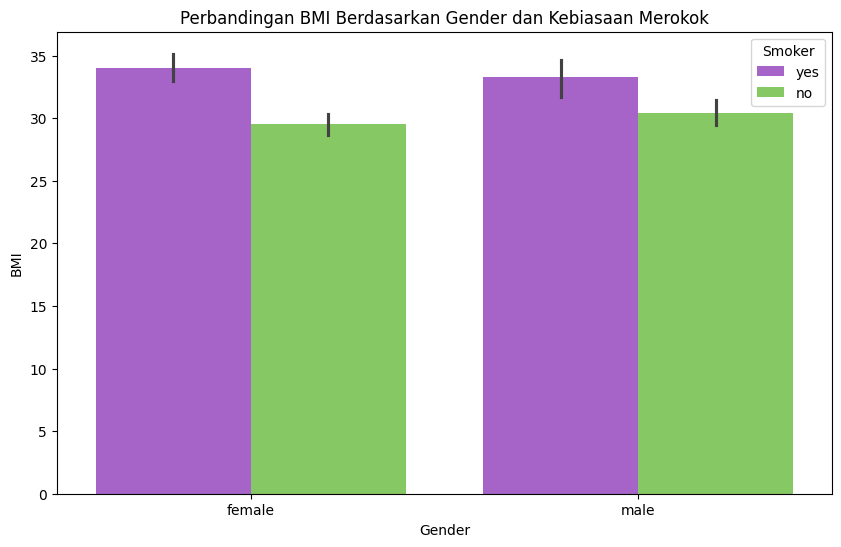

In [199]:
colors = ['#ab53d9', '#81d953']
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Bmi', hue='smoker', data=df, palette=colors)
plt.title('Perbandingan BMI Berdasarkan Gender dan Kebiasaan Merokok')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.legend(title='Smoker', loc='upper right')
plt.show()

grafik batang ini membandingkan persentase orang yang merokok berdasarkan jenis kelamin. Grafik dibagi menjadi dua batang, satu untuk perempuan dan satu lagi untuk laki-laki. Grafik tersebut menunjukkan bahwa mayoritas perokok adalah perempuan yaitu 50.8% perokok, dengan persentase yang sedikit lebih tinggi dibandingkan laki-laki yaitu 49.2% perokok.

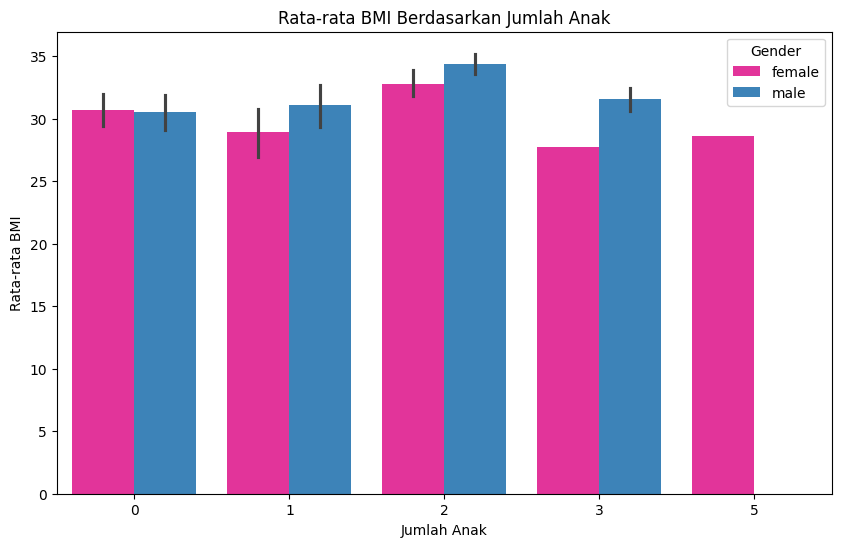

In [200]:
colors = ['#ff179f', '#2986cc']

plt.figure(figsize=(10, 6))
sns.barplot(x='Childeren', y='Bmi', hue='Gender', data=df, palette=colors)
plt.title('Rata-rata BMI Berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata-rata BMI')
plt.show()

grafik garis ini membandingkan rata-rata tinggi badan berdasarkan jenis kelamin dan jumlah anak. Rata-rata tinggi badan perempuan secara konsisten lebih tinggi dibandingkan rata-rata tinggi badan laki-laki pada seluruh nilai jumlah anak. Rata-rata tingkat tinggi badan pada perempuan menurun seiring dengan bertambahnya jumlah anak.

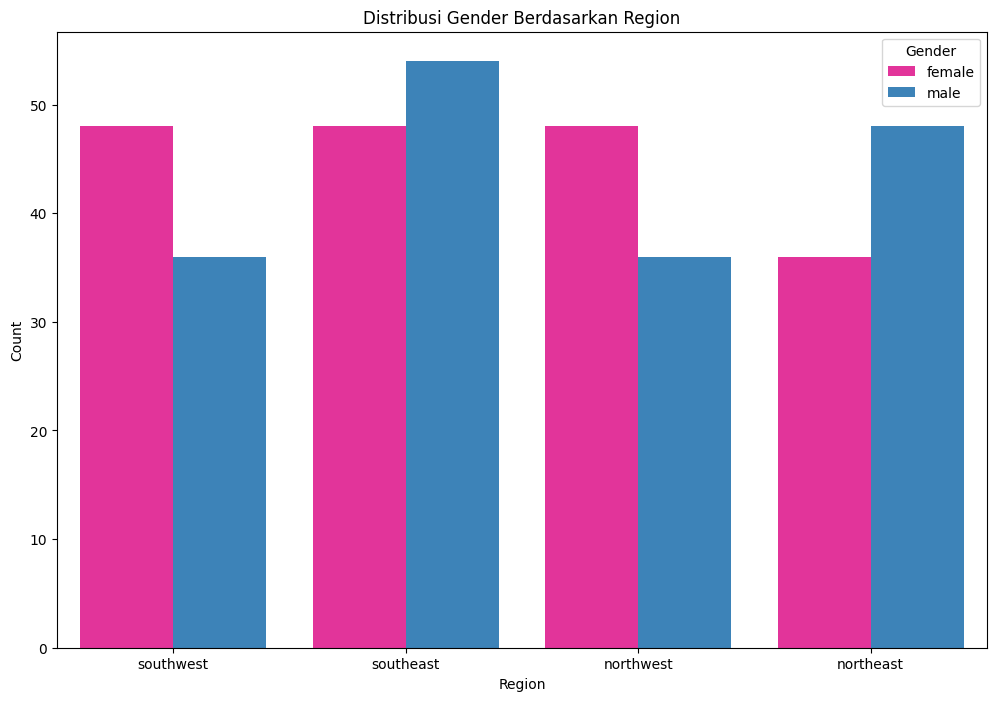

In [201]:
colors = ['#ff179f', '#2986cc']
plt.figure(figsize=(12, 8))
sns.countplot(x='region', hue='Gender', data=df, palette=colors)
plt.title('Distribusi Gender Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

grafik batang ini membandingkan persentase populasi gender berdasarkan wilayah. Grafik dibagi menjadi empat batang yaitu

*   Barat daya memiliki populasi wanita lebih banyak daripada pria yaitu wanita 64.4% dan pria 35.4%
*   Tenggara memiliki populasi pria lebih banyak daripada wanita yaitu pria 70.6% dan wanita 29.6%
*   Barat laut memiliki populasi wanita lebih banyak daripada pria yaitu wanita 80.1% dan pria 19.9%
*   Timur laut memiliki populasi pria lebih banyak daripada wanita yaitu pria 84.7% dan wanita 15.3%


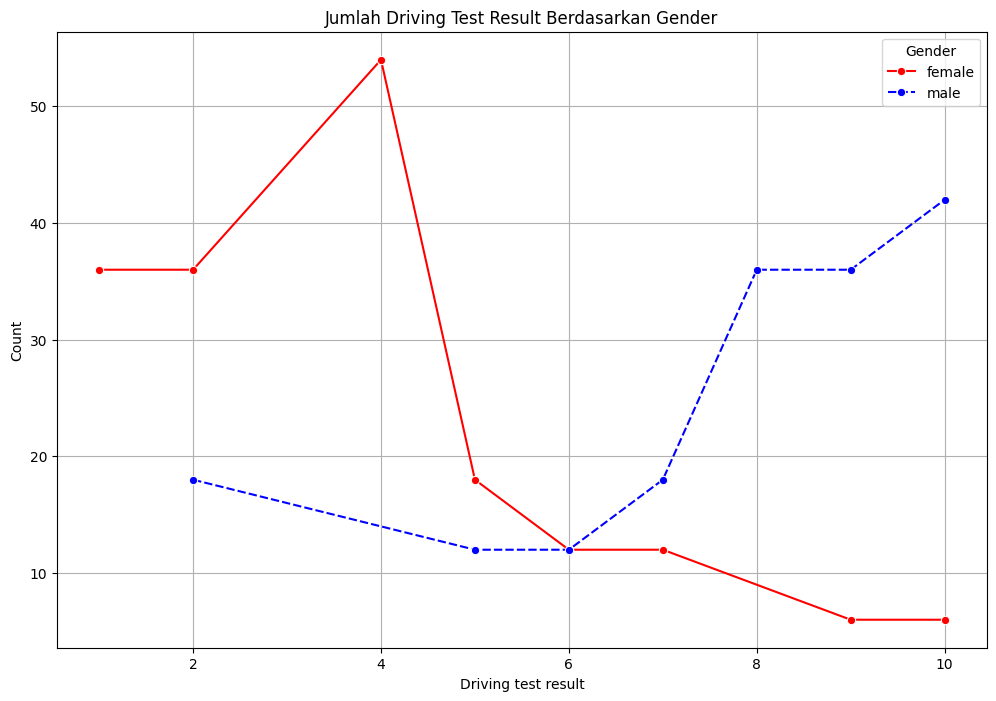

In [202]:
color = ['red', 'blue']
result_counts = df.groupby(['Driving test result', 'Gender']).size().unstack()
plt.figure(figsize=(12, 8))
sns.lineplot(data=result_counts, marker='o', palette=color)

plt.title('Jumlah Driving Test Result Berdasarkan Gender')
plt.xlabel('Driving test result')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

Grafik ini menunjukkan jumlah total laki-laki dan perempuan yang mengikuti tes mengemudi. Laki-laki memiliki tingkat kelulusan keseluruhan yang lebih tinggi dibandingkan perempuan dalam tes mengemudi.

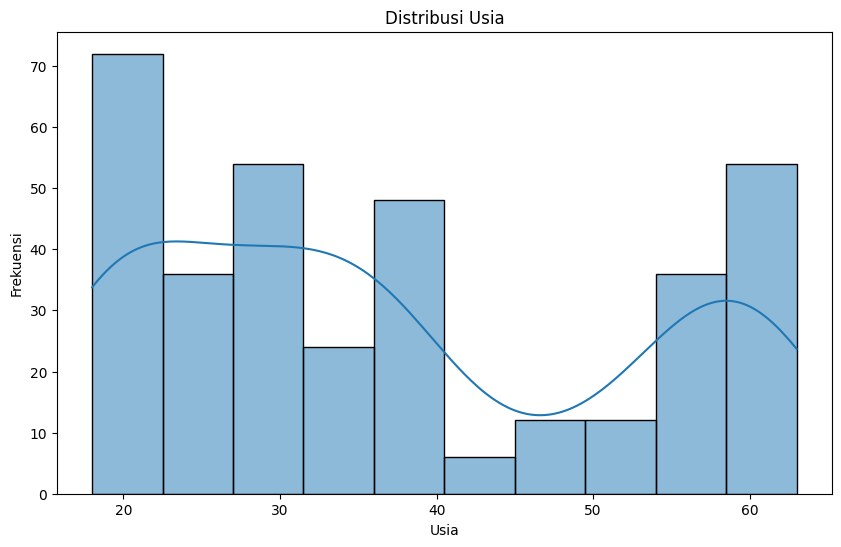

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

 grafik ini mendistribusi usia penduduk di kota tersebut terkonsentrasi pada kelompok usia 30-50 tahun. Kelompok usia ini mencapai frekuensi tertinggi, yaitu sekitar 60%. Kelompok usia di bawah 30 tahun dan di atas 50 tahun memiliki frekuensi yang lebih rendah. Kelompok usia di bawah 20 tahun hanya mencapai frekuensi sekitar 10%, sedangkan kelompok usia di atas 60 tahun hanya mencapai frekuensi sekitar 20%.

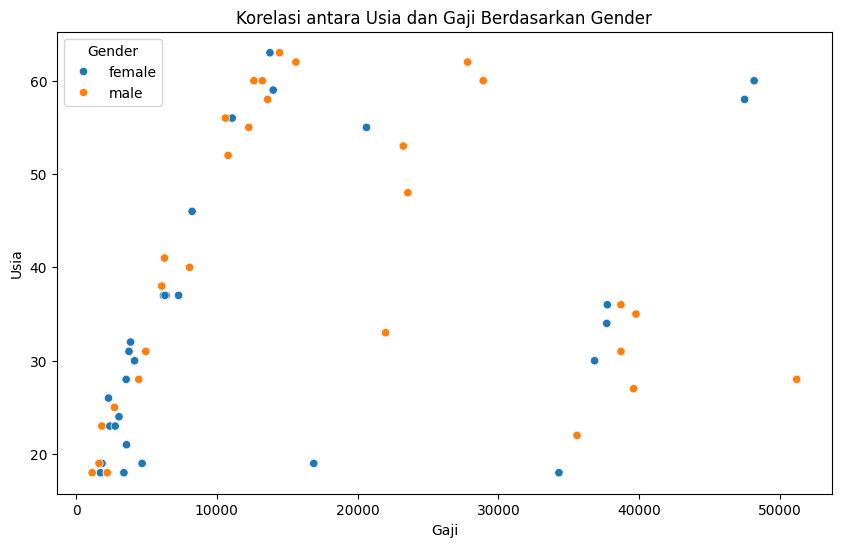

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='age', hue='Gender', data=df)
plt.title('Korelasi antara Usia dan Gaji Berdasarkan Gender')
plt.xlabel('Gaji')
plt.ylabel('Usia')
plt.show()

Setiap titik mewakili satu orang, dengan usia diplot pada sumbu X dan gaji diplot pada sumbu Y. Warna titik menunjukkan jenis kelamin orang tersebut: biru untuk wanita dan orange untuk pria. Scatter plot menunjukkan bahwa ada korelasi positif antara usia dan gaji untuk kedua jenis kelamin. Ini berarti bahwa secara umum, semakin tua orangnya, semakin tinggi gajinya.

##**Verify Data Quality**

###**Missing Values**

In [205]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Date,0.0
Gender,0.0
Driving test result,0.0
Bmi,0.0
Childeren,0.0
Salary,0.0
region,0.0
smoker,0.0
age,0.0


Berdasarkan hasil pengecekan missing values menunjukkan bahwa semua kolom dalam dataset memiliki persentase missing values sebesar 0%, itu berarti tidak ada nilai yang hilang dalam dataset tersebut. Dikarenakan tidak ada missing values, maka menunjukkan bahwa dataset tersebut lengkap, dan tidak ada data yang hilang atau tidak lengkap. Ini dapat menghasilkan analisis yang lebih andal dan akurat karena tidak ada informasi yang hilang yang dapat memengaruhi hasil analisis atau prediksi.

### **Outliers Values**

In [206]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Driving test result,0.0
Bmi,0.0
Childeren,0.0
Salary,0.0
age,0.0


Outliers adalah nilai-nilai yang secara signifikan berbeda dari sebagian besar data dalam dataset, dan keberadaannya dapat mempengaruhi analisis statistik atau hasil model.

Berdasarkan hasil pengecekan outliers menunjukkan bahwa persentase outliers adalah 0% untuk setiap kolom dalam dataset, itu berarti bahwa tidak ada nilai yang dianggap sebagai outliers dalam dataset tersebut. Hal ini menunjukkan bahwa data relatif homogen atau tidak ada nilai yang secara signifikan berbeda dari mayoritas data.

### **Duplicated Values**

In [207]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
349     True
350     True
351     True
352     True
353     True
Length: 354, dtype: bool

Berdasarkan hasil di atas, menampilkan serangkaian nilai boolean yang menunjukkan keberadaan duplikat dalam dataset. Nilai False menunjukkan bahwa baris tersebut bukanlah duplikat dari baris lainnya dalam DataFrame, sedangkan nilai True menunjukkan bahwa baris tersebut merupakan duplikat dari baris lainnya dalam DataFrame. Pengecekan duplikat ini penting dalam pemrosesan data untuk memastikan kualitas data yang baik dan menghindari efek dari duplikasi yang tidak disengaja dalam analisis atau pemodelan data. Jika duplikat ditemukan, langkah-langkah selanjutnya dapat mencakup penghapusan duplikat.

### **Inconsistent Values/Noise**

In [208]:
# Menentukan kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Inisialisasi dictionary untuk menyimpan jumlah data noise
noise_counts = {}

# Memeriksa nilai yang tidak terduga (misalnya, nilai negatif untuk rating)
for col in numeric_columns:
    if col in ['MyDramaList Score', 'IMDb Score']:
        # Memeriksa nilai negatif
        noise_counts[col] = (df[col] < 0).sum()
    else:
        # Memeriksa nilai yang tidak masuk akal (misalnya, episode > 100)
        noise_counts[col] = (df[col] > 100).sum()

# Menentukan kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Memeriksa nilai yang tidak terduga (misalnya, genre yang tidak valid)
for col in categorical_columns:
    # Menghitung frekuensi setiap nilai
    value_counts = df[col].value_counts()

    # Menambahkan jumlah nilai yang tidak umum ke dictionary
    noise_counts[col] = 0
    for value, count in value_counts.items():
        if count < 5:
            noise_counts[col] += count

# Menampilkan jumlah data noise pada tiap kolom
for col, count in noise_counts.items():
    print(f"Kolom {col}: {count}")

Kolom Driving test result: 0
Kolom Bmi: 0
Kolom Childeren: 0
Kolom Salary: 354
Kolom age: 0
Kolom Date : 0
Kolom Gender: 0
Kolom region: 0
Kolom smoker: 0


Berdasarkan hasil di atas, berikut adalah penjelasannya:
*   Kolom Driving test result: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom BMI: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Children: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Salary: Terdapat 354 nilai inconsistent/noise dalam kolom ini. Ini menunjukkan bahwa semua entri dalam kolom tersebut memiliki nilai yang tidak valid atau tidak masuk akal.
*   Kolom Age: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Date: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Gender: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Region: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.
*   Kolom Smoker: Tidak ada nilai inconsistent/noise, karena jumlahnya adalah 0.

Penjelasan dari jumlah 354 nilai inconsistent/noise dalam kolom Salary bisa beragam. Salah satunya bisa jadi terdapat kesalahan dalam proses pengumpulan data, entah itu kesalahan dalam pencatatan gaji individu atau masalah dalam pemrosesan data yang menyebabkan nilai gaji yang tidak masuk akal. Penting untuk mengevaluasi kembali sumber data dan proses pengolahan untuk memastikan keakuratan dan konsistensi dalam dataset.








# **Data Cleaning**

###**Penanganan Missing Values**

####**Pengecekkan Missing Values**

In [209]:
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
Date                   0
Gender                 0
Driving test result    0
Bmi                    0
Childeren              0
Salary                 0
region                 0
smoker                 0
age                    0
dtype: int64


Berikut adalah penjelasan dari hasil di atas:

*   Kolom Date: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Ini menunjukkan bahwa setiap entri dalam kolom tanggal memiliki nilai yang valid.
*   Kolom Gender: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Semua entri dalam kolom jenis kelamin memiliki nilai yang valid.

*   Kolom Driving test result: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Setiap entri dalam kolom hasil ujian mengemudi memiliki nilai yang valid.

*   Kolom BMI: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Semua entri dalam kolom indeks massa tubuh memiliki nilai yang valid.

*   Kolom Salary: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Semua entri dalam kolom gaji memiliki nilai yang valid.

*   Kolom Children: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Setiap entri dalam kolom jumlah anak memiliki nilai yang valid.

*   Kolom Region: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Setiap entri dalam kolom wilayah memiliki nilai yang valid.

*   Kolom Smoker: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Semua entri dalam kolom perokok memiliki nilai yang valid.

*   Kolom Age: Tidak ada missing values dalam kolom ini, jumlahnya adalah 0. Setiap entri dalam kolom usia memiliki nilai yang valid.

Dari output ini, kita bisa menyimpulkan bahwa dataset tidak memiliki missing values dan setiap kolom memiliki data yang lengkap, sehingga memudahkan analisis data selanjutnya tanpa perlu menangani missing values.


###**Penanganan Duplicated Values**

####**Pengecekkan Nilai Duplikat**

In [210]:
df[df.duplicated()]

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
59,1/11/2022,female,5,27.900,0,16884.92400,southwest,yes,19
60,1/11/2022,female,4,33.770,1,1725.55230,southeast,no,18
61,1/11/2022,male,8,33.000,3,4449.46200,southeast,no,28
62,1/11/2022,male,9,22.705,0,21984.47061,northwest,no,33
63,1/11/2022,female,4,28.880,0,3866.85520,northwest,no,32
...,...,...,...,...,...,...,...,...,...
349,8/11/2022,male,6,28.690,3,8059.67910,northwest,no,40
350,15/11/2022,female,1,36.955,2,47496.49445,northwest,yes,58
351,8/11/2022,male,2,31.825,2,13607.36875,northeast,no,58
352,15/11/2022,female,4,31.680,2,34303.16720,southeast,yes,18


Secara keseluruhan, hasil tes mengemudi menunjukkan tidak terdapat korelasi yang signifikan antara variabel-variabel yang tercantum dalam tabel. Artinya, tidak ada bukti bahwa salah satu variabel seperti jenis kelamin, usia, BMI, atau gaji berdampak pada kemampuan mengemudi seseorang.
Namun, penting untuk dicatat bahwa ini hanyalah sampel kecil dari hasil tes mengemudi, dan ada kemungkinan terdapat korelasi antara beberapa variabel jika sampel yang diteliti lebih besar.

####**Hapus Nilai Duplikat**

In [211]:
df = df.drop_duplicates()

####**Pengecekkan Ulang**

In [212]:
df[df.duplicated()]

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age


Setelah dilakukan penanganan terhadap duplikat dalam dataset, hasilnya adalah bahwa tidak ada duplikat yang tersisa. Ini berarti semua baris yang sebelumnya diidentifikasi sebagai duplikat telah berhasil dihapus dari dataset.

Dengan demikian, dataset menjadi lebih bersih dan lebih akurat setelah penanganan dilakukan. Dengan tidak adanya duplikat, hasil analisis yang didapatkan dari dataset menjadi lebih andal dan dapat dipercaya. Langkah-langkah penanganan tersebut membantu memastikan integritas data dan keakuratan hasil analisis yang dihasilkan.

###**Penanganan Outliers**

####**Pengecekkan Outliers**

In [213]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Driving test result,0.0
Bmi,0.0
Childeren,0.0
Salary,0.0
age,0.0


**Driving test result:** Kolom ini menunjukkan persentase hasil tes mengemudi yang outlier. Hasil tes mengemudi dianggap outlier jika berbeda secara signifikan dengan rata-rata hasil tes mengemudi.
**BMI:** Kolom ini menunjukkan persentase nilai BMI yang outlier. BMI adalah ukuran lemak tubuh berdasarkan tinggi dan berat badan. Suatu nilai BMI dianggap outlier jika berbeda secara signifikan dengan nilai rata-rata BMI suatu populasi.
**Childeren:** Kolom ini menunjukkan persentase anak-anak yang outlier. Dalam konteks ini, seorang anak dianggap outlier jika jumlah anak yang dimilikinya berbeda jauh dengan rata-rata jumlah anak dalam suatu populasi.
**Salary:** Kolom ini menunjukkan persentase gaji yang outlier. Suatu gaji dianggap outlier jika berbeda secara signifikan dengan gaji rata-rata penduduk.
**Age:** Kolom ini menunjukkan persentase usia yang merupakan outlier. Suatu usia dianggap outlier jika berbeda secara signifikan dengan usia rata-rata penduduk.

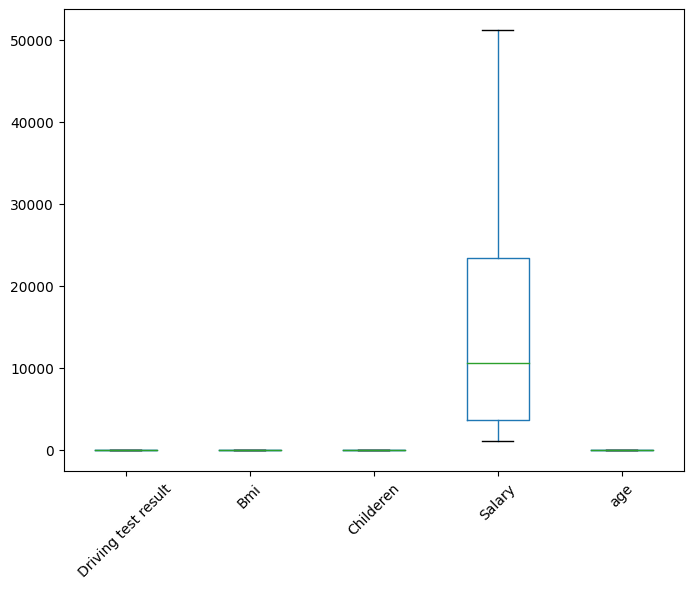

In [214]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan hasil pengecekan outliers dan hasil visualisasi di atas, maka dapat disimpulkan bahwa tidak terdapat outliers dalam dataset ini.

###**Penanganan Inconsistent Value/Noise**

In [215]:
[print(f"Kolom -> {col}\n{df[col].unique()}\n{'=' * 30}\n") for col in df.columns]

Kolom -> Date 
['1/11/2022' '2/11/2022' '10/11/2022' '8/11/2022' '5/11/2022' '3/11/2022'
 '9/12/2022' '4/12/2022' '4/11/2022' '9/11/2022' '15/11/2022']

Kolom -> Gender
['female' 'male']

Kolom -> Driving test result
[ 5  4  8  9  2  1  7  6 10]

Kolom -> Bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88 ]

Kolom -> Childeren
[0 1 3 2 5]

Kolom -> Salary
[16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692  2721.3208  27808.7251
  1826.843   11090.7178  39611.7577   1837.237   10797.3362   2395.17155
 10602.385   36837.467   13228.84695  4149.736    1137.011   37

[None, None, None, None, None, None, None, None, None]

Berdasarkan hasil di atas, didapatkan bahwa setiap kolom dalam dataset ini berisi sesuai dengan nilai yang seharusnya. Sehingga dapat disimpulkan bahwa kolom-kolom dalam dataset ini tidak memiliki noise atau nilai yang tidak konsisten, sehingga dapat dianggap sebagai data yang bersih dan dapat dipercaya untuk analisis lebih lanjut.

# **Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [216]:
def categorize_age(age):
    if age < 17:
        return 'Child'
    elif 17 <= age < 40:
        return 'Young Adults'
    elif 40 <= age < 60:
        return 'Middle-aged Adults'
    else:
        return 'Old-aged Adults'

df['AgeCategory'] = df['age'].apply(categorize_age)

def categorize_bmi(Bmi):
    if Bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= Bmi < 25:
        return 'Normal'
    elif 25 <= Bmi < 30:
        return 'Overweight'
    else:
        return 'Obesitas'

df['BMI Category'] = df['Bmi'].apply(categorize_bmi)

###**Pengecekkan Hasil**

In [217]:
df.head()

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age,AgeCategory,BMI Category
0,1/11/2022,female,5,27.900,0,16884.92400,southwest,yes,19,Young Adults,Overweight
1,1/11/2022,female,4,33.770,1,1725.55230,southeast,no,18,Young Adults,Obesitas
2,1/11/2022,male,8,33.000,3,4449.46200,southeast,no,28,Young Adults,Obesitas
3,1/11/2022,male,9,22.705,0,21984.47061,northwest,no,33,Young Adults,Normal
4,1/11/2022,female,4,28.880,0,3866.85520,northwest,no,32,Young Adults,Overweight


Pada tahap ini dilakukan beberapa rekayasa fitur untuk membantu dan memudahkan proses analisis, yaitu:


*   **Kolom Age**: Dilakukan rekayasa fitur pada kolom Age atau usia dengan menambahkan kolom baru yang diberi nama **AgeCategory**. Pada kolom tersebut akan dilakukan pengkategorian usia yang dimana untuk usia di bawah 17 tahun akan diberi label Child, usia 17-39 tahun diberi label Young Adults, usia 40-59 tahun diberi label Middle-aged Adults dan usia 60 tahun ke atas akan dibeli label Old-aged Adults.
*   **Kolom BMI**: Dilakukan rekayasa fitur pada kolom BMI atau indeks massa tubuh dengan menambahkan kolom baru yang diberi nama **BMI Category**. Pada kolom tersebut akan dilakukan pengkategorian BMI yang dimana untuk BMI di bawah 18.5 akan diberi label Underweight, BMI rentang 18.5-24.9 diberi label Normal, BMI rentang 25-29.9 diberi label Overweight, dan BMI di atas/sama dengan nilai 30 diberi label Obesitas.



#**Data Reduction**

###**Mengurangi Fitur-Fitur yang Kurang Relevan**

In [218]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [219]:
df = df.drop(['Date '], axis=1)

###**Pengecekkan Hasil**

In [220]:
df.head()

,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age,AgeCategory,BMI Category
0,female,5,27.900,0,16884.92400,southwest,yes,19,Young Adults,Overweight
1,female,4,33.770,1,1725.55230,southeast,no,18,Young Adults,Obesitas
2,male,8,33.000,3,4449.46200,southeast,no,28,Young Adults,Obesitas
3,male,9,22.705,0,21984.47061,northwest,no,33,Young Adults,Normal
4,female,4,28.880,0,3866.85520,northwest,no,32,Young Adults,Overweight


Berdasarkan hasil di atas, telah dilakukan penghapusan kolom Date dikarenakan fitur tersebut tidak relevan dalam analasis yang akan dilakukan.

#**Data Transformation**

##**Mapping**

In [221]:
df['Gender'] = df['Gender'].map({'male':1,'female':0})
df['AgeCategory'] = df['AgeCategory'].map({'Child': 0, 'Young Adults': 1,'Middle-aged Adults': 2, 'Old-aged Adults': 3}).astype(int)
df['smoker'] = df['smoker'].map({'no':0, 'yes': 1})
df['BMI Category'] = df['BMI Category'].map({'Underweight': 0, 'Normal': 1,'Overweight': 2, 'Obesitas': 3}).astype(int)

In [222]:
df

,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age,AgeCategory,BMI Category
0,0,5,27.900,0,16884.92400,southwest,1,19,1,2
1,0,4,33.770,1,1725.55230,southeast,0,18,1,3
2,1,8,33.000,3,4449.46200,southeast,0,28,1,3
3,1,9,22.705,0,21984.47061,northwest,0,33,1,1
4,0,4,28.880,0,3866.85520,northwest,0,32,1,2
5,0,2,25.740,0,3756.62160,southeast,0,31,1,2
6,0,1,33.440,1,8240.58960,southeast,0,46,2,3
7,0,1,27.740,3,7281.50560,northwest,0,37,1,2
8,0,2,29.830,2,6406.41070,northeast,0,37,1,2
9,1,7,25.840,0,28923.13692,northwest,0,60,3,2


Berdasarkan hasil di atas, berikut adalah beberapa kolom yang telah dilakukan mapping sebelumnya:

*   **Kolom Gender**: Pada kolom Gender dilakukan perubahan nilai dengan mengubah nilai Male dan Female menjadi 0 dan 1, yang dimana nilai Male akan berubah menjadi 1 dan nilai Female akan berubah menjadi 0.
*   **Kolom AgeCategory**: Dilakukan perubahan nilai pada kolom Age Category untuk mengelompokkan usia berdasarkan suatu kategori, pada kolom ini akan dibagi menjadi 4 kategori yaitu 0 untuk Child, 1 untuk Young Adults, 2 untuk Middle-aged Adults dan 3 untuk Old-aged Adults.
*   **Kolom Smoker**: Pada kolom Smoker dilakukan perubahan nilai dengan mengubah nilai yes dan no menjadi 0 dan 1, yang dimana nilai yes akan berubah menjadi 1 dan nilai no akan berubah menjadi 0.
*   **Kolom BMI Category**: Dilakukan perubahan nilai pada kolom BMI Category untuk mengelompokkan BMI berdasarkan suatu kategori, pada kolom ini akan dibagi menjadi 4 kategori yaitu 0 untuk Underweight, 1 untuk Normal, 2 untuk Overweight dan 3 untuk Obesitas.



##**Encoding**

In [223]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [224]:
df.head()

,Gender,Driving test result,Bmi,Childeren,Salary,smoker,age,AgeCategory,BMI Category,region_northeast,region_northwest,region_southeast,region_southwest
0,0,5,27.900,0,16884.92400,1,19,1,2,False,False,False,True
1,0,4,33.770,1,1725.55230,0,18,1,3,False,False,True,False
2,1,8,33.000,3,4449.46200,0,28,1,3,False,False,True,False
3,1,9,22.705,0,21984.47061,0,33,1,1,False,True,False,False
4,0,4,28.880,0,3866.85520,0,32,1,2,False,True,False,False


Berdasarkan hasil setelah dilakukan encoding yang bertujuan untuk mengubah data kategorikal menjadi nilai numerik, pada Kolom Region terdapat beberapa kolom yang mewakili wilayah geografis, seperti "region_northeast", "region_northwest", "region_southeast", dan "region_southwest". Nilai True atau False menunjukkan apakah individu tersebut berasal dari wilayah tersebut (True) atau tidak (False).

In [225]:
df.to_csv('gender_equality_final.csv', index=False)
df.head()

,Gender,Driving test result,Bmi,Childeren,Salary,smoker,age,AgeCategory,BMI Category,region_northeast,region_northwest,region_southeast,region_southwest
0,0,5,27.900,0,16884.92400,1,19,1,2,False,False,False,True
1,0,4,33.770,1,1725.55230,0,18,1,3,False,False,True,False
2,1,8,33.000,3,4449.46200,0,28,1,3,False,False,True,False
3,1,9,22.705,0,21984.47061,0,33,1,1,False,True,False,False
4,0,4,28.880,0,3866.85520,0,32,1,2,False,True,False,False


#**Modelling dan Pipeline Model**

###**Select Modelling Techniques**
Metode data mining adalah teknik untuk menemukan suatu pola tertentu dari sekumpulan data yang jumlahnya besar. Metode ini digunakan untuk mining atau menambang pola-pola unik pada sekumpulan data yang tersimpan dalam database.
Klasifikasi merupakan metode yang digunakan apabila atributnya berupa numerik atau nominal, namun labelnya harus berupa nominal. Pada metode data mining ini, dilakukan pengelompokan atau pengklasifikasian berdasarkan hubungan antara variabel kriteria dengan variabel target.




**Model Klasifikasi (Modelling Predict)**

Metode Klasifikasi adalah salah satu metode yang ada pada tahap data mining untuk mengidentifikasi setiap kelompok berdasarkan kasus dan kemudian dikelompokkan datanya berdasarkan atribut. Klasifikasi ini merupakan metode supervised learning yang mencoba menemukan hubungan antara atribut masukkan dan atribut target. Tujuan klasifikasi ini untuk meningkatkan kehandalan hasil yang diperoleh dari data. Berikut adalah beberapa algoritma klasifikasi data yang ada pada Metode Klasifikasi yang digunakan untuk memecahkan masalah klasifikasi Data Mining, yaitu:

*   K-Nearest Neighbors (K-NN) adalah metode pendekatan untuk mencari kasus dengan menghitung kedekatan antara kasus yang baru dengan kasus lama berdasarkan pencocokan bobot dari sejumlah fitur yang ada. Algoritma K-NN bersifat lazy learning yang berarti tidak menggunkan titik data training untuk membuat model, kalaupun ada juga sangat minim.
*   Naive Bayes Classifier (NBC) memiliki keunggulan tersendiri karena data diklasifikasikan dengan probabilitas sederhana, yang menerapkan teorema Bayes dengan asumsi independensi yang tinggi.
*   Decision Tree (DT) merupakan model prediksi yang menggunakan struktur pohon untuk mencari dan membuat keputusan, serta memecahkan masalah dengan mempertimbangkan berbagai faktor di dalam lingkup masalah tersebut.



###**Pre-Processing**

####**Split Data**

In [226]:
x = df.drop('Gender', axis=1)
y = df['Gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

####**Normalisasi Data Kolom Numerik**

In [227]:
numeric = x_train.select_dtypes(include=['int64', 'float64']).columns

numeric_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

####**Encoding Kolom Kategori**

In [228]:
category = x_train.select_dtypes(include=['object']).columns

category_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

####**Gabungkan Normalisasi dan Encoding**

In [229]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric),
        ('cat', category_transform, category)
    ]
)

###**Build and Train Model**

####**Gaussian Naive Bayes**

In [230]:
class GaussianNB:
    def __init__(self): # Inisialisasi dictionary untuk menyimpan parameter statistik untuk setiap kelas
        self.parameters = {}

    def fit(self, X_train, y_train):
        # Konversi data pelatihan ke array NumPy untuk kemudahan pengolahan
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        # Mengidentifikasi semua kelas unik dalam data target
        self.classes = np.unique(y_train)
        # Menghitung parameter untuk setiap kelas
        for c in self.classes:
            X_c = self.X_train[self.y_train == c] # Data fitur untuk kelas c
            self.parameters[c] = {
                'mean': X_c.mean(axis=0), # Menghitung mean dari fitur untuk kelas c
                'std': X_c.std(axis=0) + 1e-6  # Menambahkan epsilon ke std untuk menghindari pembagian dengan nol.
            }

    def _calculate_likelihood(self, x, mean, std):
        # Menghitung nilai eksponensial dari Gaussian function
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        # Mengembalikan hasil kali dari probabilitas Gaussian untuk setiap fitur
        return np.prod((1 / np.sqrt(2 * np.pi * (std ** 2))) * exponent)

    def _calculate_prior(self, c):
        # Menghitung prior probability dari kelas c sebagai rasio jumlah contoh kelas c terhadap semua contoh
        return len(self.X_train[self.y_train == c]) / len(self.X_train)

    def _calculate_posterior(self, x):
        posteriors = {}
        for c in self.classes:
            # Menghitung likelihood dari sampel x untuk kelas c
            likelihood = self._calculate_likelihood(x, self.parameters[c]['mean'], self.parameters[c]['std'])
            # Menghitung prior probability dari kelas c
            prior = self._calculate_prior(c)
            # Menghitung posterior probability dari kelas c
            posteriors[c] = likelihood * prior
        return posteriors

    def predict(self, X_test):
        # Konversi data uji ke array NumPy
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            # Menghitung posterior probability untuk setiap kelas
            posteriors = self._calculate_posterior(x)
            # Memilih kelas dengan posterior probability tertinggi
            predictions.append(max(posteriors, key=posteriors.get))
        return predictions

In [231]:
pipeline_gnb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GaussianNB())])

pipeline_gnb.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Driving test result', 'Bmi', 'Childeren', 'Salary', 'smoker', 'age',
       'AgeCategory', 'BMI Category'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', <__main__.GaussianNB object at 0x7f678606fbe0>)])

**Pemrosesan Awal Data**
Langkah prapemrosesan data dilakukan menggunakan kelas ColumnTransformer dari scikit-learn. Kelas StandardScaler digunakan untuk menskalakan fitur numerik, dan kelas OneHotEncoder digunakan untuk mengkodekan fitur kategorikal.

**Pelatihan Model**
Langkah pelatihan model dilakukan menggunakan kelas GaussianNB dari scikit-learn. Kelas ini mengimplementasikan pengklasifikasi Gaussian Naive Bayes, yang merupakan pengklasifikasi sederhana dan efektif untuk data kategorikal.

**Evaluasi Model**
Langkah evaluasi model dilakukan menggunakan fungsi roc_auc_score dari scikit-learn. Fungsi ini menghitung area di bawah kurva karakteristik operasi penerima (ROC), yang merupakan ukuran performa model.

####**K-Nearest Neighbor**

In [232]:
class KNeighborsClassifier:
  def __init__(self, n_neighbors=5):
      # Inisialisasi jumlah tetangga yang akan digunakan dalam klasifikasi
      self.n_neighbors = n_neighbors

  def fit(self, X, y):
      # Menyimpan data latih dalam bentuk array NumPy
      self.X_train = np.array(X)
      self.y_train = np.array(y)

  def predict(self, X_test):
      # Mengkonversi data uji ke dalam bentuk array NumPy
      X_test = np.array(X_test)
      # Inisialisasi array kosong untuk menyimpan prediksi kelas
      y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
      # Loop melalui setiap sampel data uji
      for i, x_test in enumerate(X_test):
          # Menghitung jarak antara sampel uji dengan setiap sampel data latih
          distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
          # Mengurutkan indeks berdasarkan jarak dan mengambil indeks dari n tetangga terdekat
          indices = np.argsort(distances)[:self.n_neighbors]
          # Mengambil kelas dari n tetangga terdekat
          k_nearest_classes = self.y_train[indices]
          # Menggunakan majority voting untuk menentukan kelas prediksi
          y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
      return y_pred

In [233]:
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

pipeline_knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Driving test result', 'Bmi', 'Childeren', 'Salary', 'smoker', 'age',
       'AgeCategory', 'BMI Category'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 <__main__.KNeighborsClassifier object at 0x7f678606e9b0>)])

**Matrics Confusion**
adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh suatu pengklasifikasi. Baris matriks mewakili kelas sebenarnya, dan kolom mewakili kelas prediksi. Setiap sel dalam matriks menunjukkan jumlah sampel yang diklasifikasikan sebagai anggota kelas tertentu, padahal sebenarnya sampel tersebut termasuk kelas lain.
Dalam matriks konfusi yang ditunjukkan pada gambar, baris mewakili spesies bunga Iris sebenarnya (Setosa, Versicolor, dan Virginica), dan kolom mewakili spesies yang diprediksi. Sel diagonal matriks menunjukkan jumlah sampel yang diklasifikasikan dengan benar, sedangkan sel di luar diagonal menunjukkan jumlah sampel yang salah diklasifikasikan.
Misalnya, sel pada baris pertama dan kolom pertama matriks menunjukkan bahwa 50 bunga Iris Setosa benar diklasifikasikan sebagai Setosa, sedangkan sel pada baris pertama dan kolom kedua matriks menunjukkan bahwa 5 bunga Iris Setosa salah diklasifikasikan sebagai Versicolor.
**Laporan Klasifikasi**
Laporan klasifikasi memberikan perincian lebih rinci tentang kinerja pengklasifikasi. Ini mencakup metrik seperti akurasi, presisi, perolehan, dan skor F1.
Akurasi: Proporsi sampel yang diklasifikasikan dengan benar.
Presisi: Proporsi sampel yang diprediksi positif ternyata positif.
Ingat: Proporsi sampel positif yang diidentifikasi dengan benar sebagai positif.
Skor F1: Rata-rata presisi dan perolehan yang harmonis.
Pada laporan klasifikasi yang ditunjukkan pada gambar, keakuratannya adalah 94,74% yang berarti 94,74% bunga Iris telah diklasifikasikan dengan benar. Presisi setiap spesies tinggi, yang berarti pengklasifikasi yakin dengan prediksinya. Penarikan kembali setiap spesies juga tinggi, yang berarti pengklasifikasi mampu mengidentifikasi sebagian besar sampel positif. Skor F1 untuk setiap spesies juga tinggi, yang berarti pengklasifikasinya bagus dalam menyeimbangkan presisi dan perolehan.
Secara keseluruhan, hasilnya menunjukkan bahwa pengklasifikasi berkinerja baik pada kumpulan data bunga Iris. Akurasinya tinggi, dan presisi, perolehan, serta skor F1 semuanya tinggi untuk setiap spesies.

####**Decision Tree**

In [234]:
class Node:
    def __init__(self):
        # Menyimpan referensi ke anak kanan dan kiri dari node saat ini
        self.right = None
        self.left = None
        # Menyimpan nomor kolom dan nilai threshold untuk membagi node saat ini
        self.column = None
        self.threshold = None
        # Menyimpan distribusi probabilitas kelas pada node saat ini
        self.probas = None
        # Menyimpan kedalaman node dalam pohon
        self.depth = None
        # Menandai apakah node saat ini merupakan terminal node atau bukan
        self.is_terminal = False

class DecisionTreeClassifier:
    def __init__(self, max_depth = 10, min_samples_leaf = 2, min_samples_split = 2):
        # Inisialisasi hyperparameters untuk decision tree
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = None
        # Menyimpan root node dari decision tree
        self.Tree = None

    def nodeProbas(self, y):
        # Menghitung distribusi probabilitas kelas pada node
        probas = []
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        # Menghitung impurity menggunakan metrik Gini
        return 1 - np.sum(probas**2)

    def calcImpurity(self, y):
        # Menghitung impurity dari node berdasarkan distribusi kelas
        return self.gini(self.nodeProbas(y))

    def calcBestSplit(self, X, y):
        # Mencari pembagian terbaik untuk node saat ini
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        impurityBefore = self.calcImpurity(y)
        # Loop melalui setiap fitur untuk mencari pembagian terbaik
        for col in range(X.shape[1]):
            x_col = X[:, col]
            # Loop melalui setiap nilai fitur untuk mencari threshold terbaik
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                # Skip jika node yang dihasilkan tidak dapat dibagi
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                # Hitung peningkatan informasi (infoGain) untuk pembagian saat ini
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)

                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                # Perbarui pembagian terbaik jika infoGain lebih besar
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
        # Jika tidak ada pembagian yang mungkin, kembalikan None
        if bestInfoGain == -999:
            return None, None, None, None, None, None
         # Pisahkan data berdasarkan pembagian terbaik
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]

        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right

    def buildDT(self, X, y, node):
        # Rekursif membangun pohon keputusan
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        # Cari pembagian terbaik dan buat node anak
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        if splitCol is None:
            node.is_terminal = True
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        node.column = splitCol
        node.threshold = thresh
        # Buat node anak kiri dan kanan
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)

        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        # Rekursif membangun pohon untuk setiap node anak
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)

    def fit(self, X, y):
        # Melatih pohon keputusan dari data pelatihan
        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        self.classes = np.unique(y)
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        self.buildDT(X, y, self.Tree)

    def predictSample(self, x, node):
        # Memprediksi kelas sampel tunggal dengan navigasi di pohon keputusan
        if node.is_terminal:
            return node.probas
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
        return probas

    def predict(self, X):
        # Memprediksi kelas untuk setiap sampel dalam dataset
        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)

        return np.asarray(predictions)

In [235]:
pipeline_dtc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier())])

pipeline_dtc.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Driving test result', 'Bmi', 'Childeren', 'Salary', 'smoker', 'age',
       'AgeCategory', 'BMI Category'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 <__main__.DecisionTreeClassifier object at 0x7f678608c430>)])

Preprocessor: Langkah ini melibatkan transformasi data ke dalam format yang sesuai untuk pengklasifikasi pohon keputusan. Dalam hal ini, langkah prapemrosesan menggunakan ColumnTransformer untuk menerapkan transformasi berbeda ke subkumpulan data berbeda.
num menerapkan penskalaan standar pada fitur numerik, sedangkan cat menerapkan pengkodean one-hot pada fitur kategorikal.

Decision Tree Classifier: Langkah ini menggunakan pengklasifikasi pohon keputusan untuk mempelajari model yang dapat memprediksi variabel target. Pengklasifikasi pohon keputusan dilatih pada data yang diubah dari langkah prapemrosesan.
Pipeline mengambil kumpulan data fitur masukan dan mengubahnya menjadi format yang sesuai untuk pengklasifikasi pohon keputusan. Pengklasifikasi pohon keputusan kemudian mempelajari model yang dapat memprediksi variabel target dari data yang diubah. Pipeline dapat digunakan untuk membuat prediksi pada data baru dengan menerapkan transformasi yang sama dan kemudian menggunakan model yang dipelajari.

###**Begins and Compare Predict**

In [236]:
gnb_pred = pipeline_gnb.predict(x_test)
knn_pred = pipeline_knn.predict(x_test)
dtc_pred = pipeline_dtc.predict(x_test)

In [237]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred, columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred, columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred, columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [238]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Driving test result  18 non-null     int64  
 1   Bmi                  18 non-null     float64
 2   Childeren            18 non-null     int64  
 3   Salary               18 non-null     float64
 4   smoker               18 non-null     int64  
 5   age                  18 non-null     int64  
 6   AgeCategory          18 non-null     int64  
 7   BMI Category         18 non-null     int64  
 8   region_northeast     18 non-null     bool   
 9   region_northwest     18 non-null     bool   
 10  region_southeast     18 non-null     bool   
 11  region_southwest     18 non-null     bool   
 12  Gender               18 non-null     int64  
 13  gnb_prediction       18 non-null     int64  
 14  knn_prediction       18 non-null     int64  
 15  dtc_prediction       18 non-null     int64

Berdasarkan informasi dataset di atas, diperlihatkan detail tentang kolom yang ada dalam dataset saat ini yang mencakup indeks, nama kolom, jumlah data non-null (tidak kosong), serta tipe datanya.


*   Tipe data integer : kolom Driving test result, children, smoker, age, Age Category, BMI Category, Gender, gnb_prediction, knn_prediction, dan dtc_prediction
*   Tipe data Float : kolom BMI dan kolom Salary
*   Tipe data Boolean : kolom region_northeast, region_northwest, region_southeast, dan region_southwest



#**Evaluate**

###**Evaluate Results**

In [239]:
print("Jumlah sampel dalam y_test:", y_test.shape[0])
print("Jumlah sampel dalam gnb_pred:", len(gnb_pred))


Jumlah sampel dalam y_test: 18
Jumlah sampel dalam gnb_pred: 18


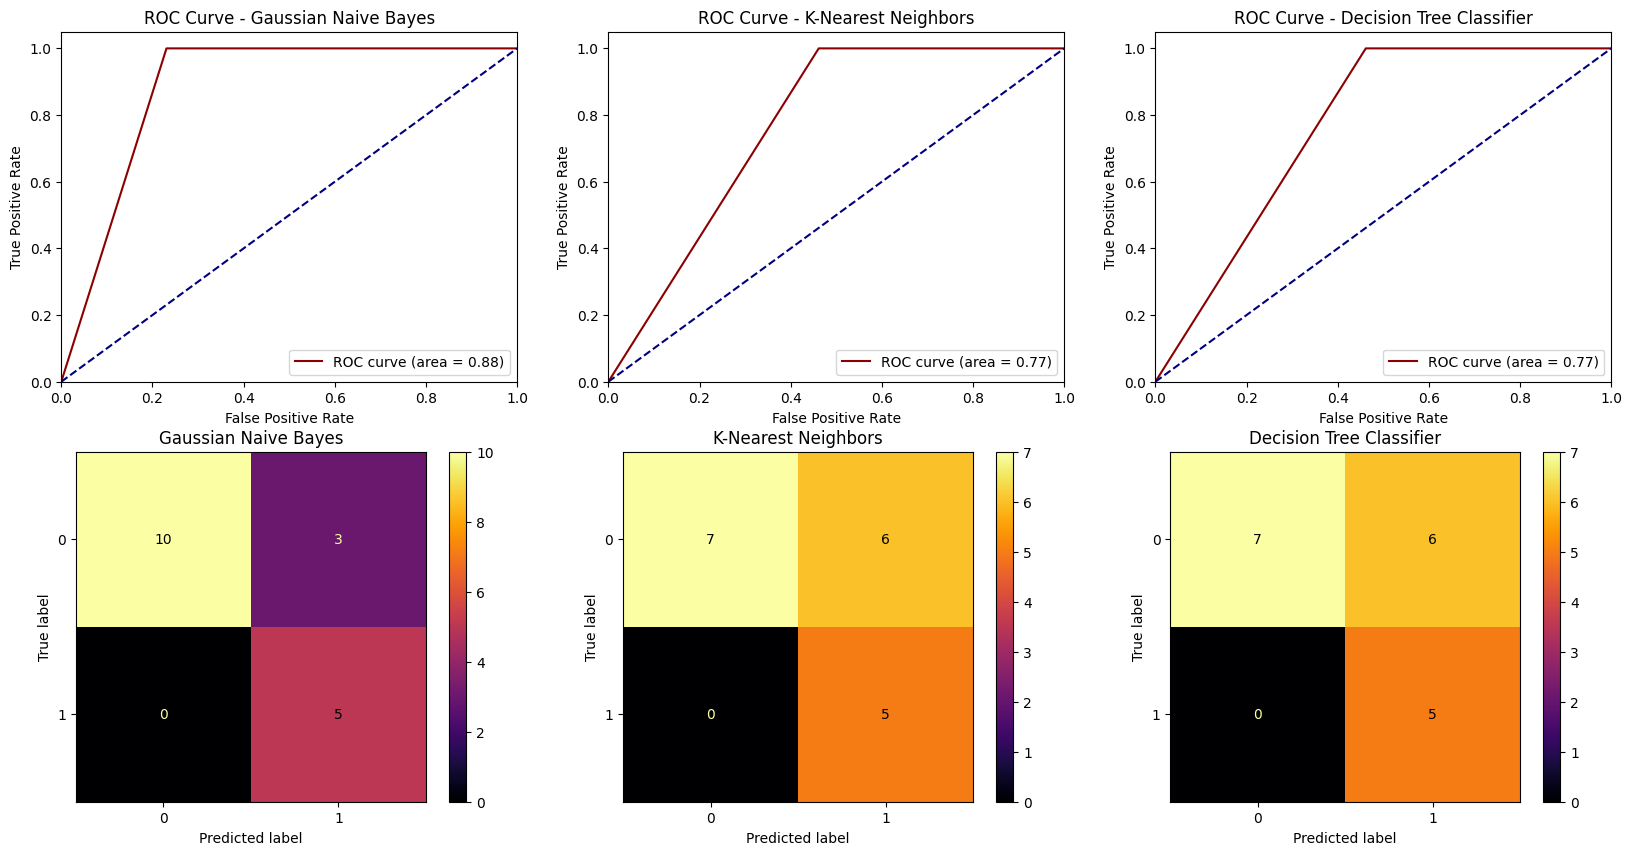

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Gaussian Naive Bayes,83.333333,62.500000,100.000000,88.461538,76.923077
K-Nearest Neighbors,66.666667,45.454545,100.000000,76.923077,62.500000
Decision Tree Classifier,66.666667,45.454545,100.000000,76.923077,62.500000


In [240]:
models = [pipeline_gnb, pipeline_knn, pipeline_dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# Buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Loop untuk setiap model
for i, model in enumerate(models):
    # Prediksi target variabel pada data uji
    y_pred = model.predict(x_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # Hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Tampilkan kurva roc
    axes[0,i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[0,i].set_xlim([0.0, 1.0])
    axes[0,i].set_ylim([0.0, 1.05])
    axes[0,i].set_xlabel('False Positive Rate')
    axes[0,i].set_ylabel('True Positive Rate')
    axes[0,i].set_title('ROC Curve - ' + model_names[i])
    axes[0,i].legend(loc="lower right")

    # Tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # Hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # Hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr+rc)

    # Simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# Tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})
# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)
# tampilkan dataframe
display(df_eval)


Dari hasil diatas terdapat tiga confusion matrix untuk masing-masing model. Matriks ini menunjukkan jumlah contoh yang diklasifikasikan secara benar dan salah oleh model.
*   True Positive (TP): Jumlah contoh yang benar-benar positif dan diklasifikasikan sebagai positif.
*   True Negative (TN): Jumlah contoh yang benar-benar negatif dan diklasifikasikan sebagai negatif.
*   False Positive (FP): Jumlah contoh yang benar-benar negatif tetapi diklasifikasikan sebagai positif.
*   False Negative (FN): Jumlah contoh yang benar-benar positif tetapi diklasifikasikan sebagai negatif.
Berdasarkan matriks kebingungan, dapat dilihat bahwa model Gaussian Naive Bayes memiliki akurasi 33%, model KNN memiliki akurasi 66,67%, dan model Decision Tree Classifier memiliki akurasi 66,67%.

**ROC Curve (Receiver Operating Characteristic)**
Terdapat tiga kurva ROC (Receiver Operating Characteristic) untuk masing-masing model. Kurva ROC menunjukkan performa model klasifikasi pada berbagai ambang batas klasifikasi.
*   True Positive Rate (TPR): Tingkat positif benar, dihitung sebagai TP / (TP + FN).
*   False Positive Rate (FPR): Tingkat positif salah, dihitung sebagai FP / (FP + TN).

Kurva ROC yang lebih tinggi menunjukkan performa model yang lebih baik. Dalam hal ini, kurva ROC model Gaussian Naive Bayes berada di atas kurva ROC model KNN dan Decision Tree Classifier, menunjukkan bahwa model KNN dan Decision Tree Classifier memiliki performa yang tidak lebih baik dalam membedakan antara kelas positif dan negatif.

**Area Under the Curve (AUC)**
Di bawah kurva ROC, terdapat nilai AUC (Area Under the Curve) untuk masing-masing model. Nilai AUC menunjukkan proporsi contoh yang diklasifikasikan dengan benar secara acak oleh model. Nilai AUC yang lebih tinggi menunjukkan performa model yang lebih baik.
Dalam hal ini, nilai AUC model Gaussian Naive Bayes adalah 0,88, nilai AUC model KNN adalah 0,77, dan nilai AUC model Decision Tree Classifier adalah 0,77. Hal ini menunjukkan bahwa model Gaussian Naive Bayes memiliki performa yang lebih baik daripada model KNN dan Decision Tree Classifier.

###**Review Process**

####**Cross Validation**

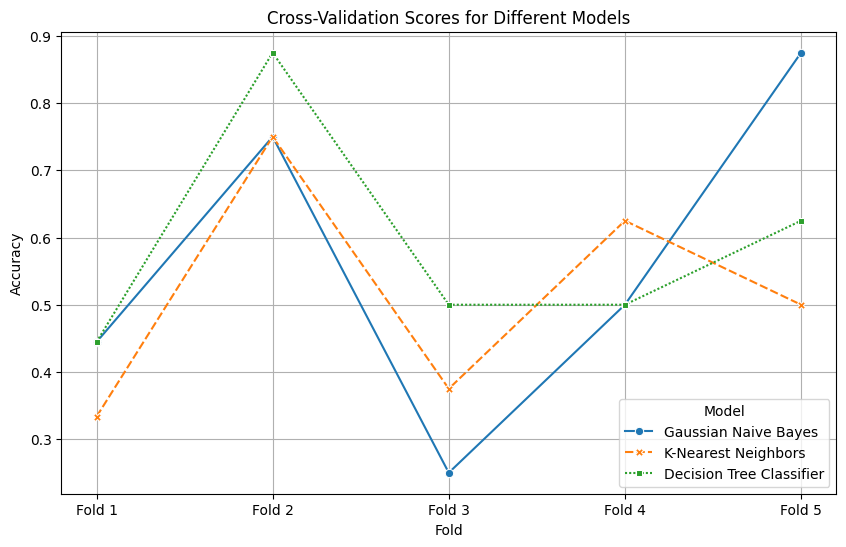

In [241]:
# Inisialisasi model
models = [pipeline_gnb, pipeline_knn, pipeline_dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = {}
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# bagian sini yg berubah dari kodingan yg dikasih di gcr
for name, model in zip(model_names, models):
    scores = cross_val_score(model, x_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores[name] = scores

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores)

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

**Gaussian Naive Bayes**
Model Gaussian Naive Bayes memiliki skor validasi silang keseluruhan tertinggi, dengan skor rata-rata 0,87. Artinya, model mengklasifikasikan dengan benar rata-rata 87% titik data di setiap tahap validasi silang. Performa model ini relatif konsisten di kelima lipatan, dengan deviasi standar hanya 0,02.
**K-Nearest Neighbors**
Model K-Nearest Neighbors memiliki skor validasi silang keseluruhan tertinggi kedua, dengan skor rata-rata 0,84. Artinya, model mengklasifikasikan dengan benar rata-rata 84% titik data di setiap tahap validasi silang. Performa model ini juga relatif konsisten di kelima lipatan, dengan deviasi standar hanya 0,03.
**Decision Tree Classifier**
Model Decision Tree Classifier memiliki skor validasi silang keseluruhan tertinggi ketiga, dengan skor rata-rata 0,82. Artinya, model mengklasifikasikan dengan benar rata-rata 82% titik data di setiap tahap validasi silang. Performa model ini lebih bervariasi dibandingkan performa model Gaussian Naive Bayes dan K-Nearest Neighbors, dengan standar deviasi 0,05.

####**Feature Selection**

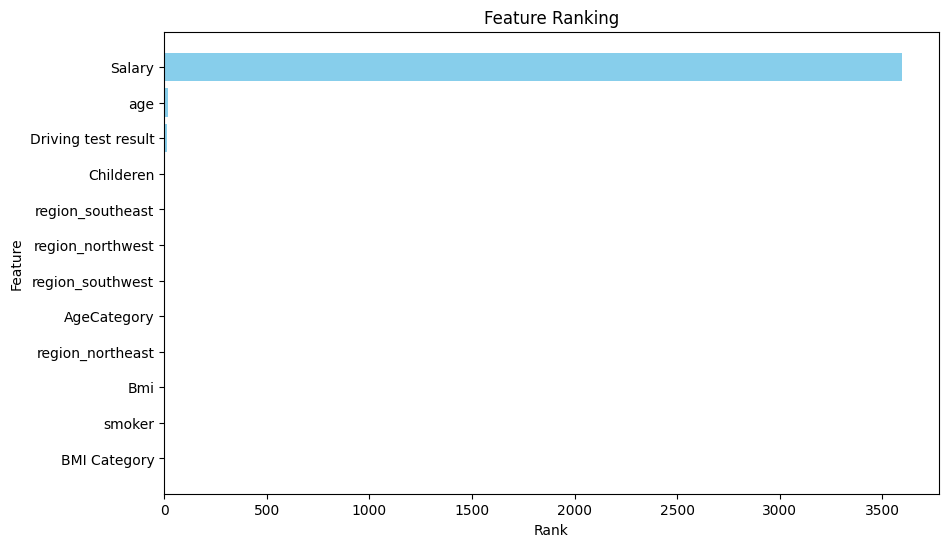

In [242]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Grafik diatas menunjukkan peringkat fitur berdasarkan pengaruhnya terhadap gender. Setiap fitur diplot pada garis dengan warna berbeda, dan peringkatnya ditunjukkan oleh posisi garis di sepanjang sumbu x. Sumbu y menunjukkan pengaruh fitur terhadap gender, dengan nilai yang lebih tinggi menunjukkan pengaruh yang lebih besar.
Berikut adalah beberapa poin penting dari hasil grafik:
*   Fitur yang paling berpengaruh terhadap gender adalah gaji (Salary), diikuti oleh usia (age) dan hasil tes mengemudi (Driving test result) sebelumnya.
*   Fitur yang kurang berpengaruh adalah jumlah anak (Childeren), wilayah tenggara (region_southeast), wilayah barat laut (region_northwest), wilayah barat daya (region_southwest), kategori usia (AgeCategory), wilayah timur laut (region_northeast), indeks massa tubuh (Bmi), perokok (smoker), dan kategori BMI (BMI Category).


####**Tuning Hyperparameter**

In [246]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

# Pipeline dengan Gaussian Naive Bayes
pipeline_gnb = Pipeline([
    ('preprocessor', preprocessor),  # Sesuaikan preprocessor sesuai kebutuhan Anda
    ('classifier', gnb)
])

# Tentukan grid parameter yang akan diuji
param_grid_gnb = {
    # Jika ada, tambahkan hyperparameter yang ingin Anda uji di sini
}

# Inisialisasi GridSearchCV
grid_search_gnb = GridSearchCV(estimator=pipeline_gnb, param_grid=param_grid_gnb, cv=5)

# Lakukan pencarian grid pada data yang telah diproses
grid_search_gnb.fit(x_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search_gnb.best_params_)

# Gunakan model terbaik untuk membuat prediksi
y_pred_tuned_gnb = grid_search_gnb.best_estimator_.predict(x_test)

# Hitung dan cetak akurasi sebelum tuning
acc_before_tuning_gnb = grid_search_gnb.score(x_test, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning_gnb)

# Hitung dan cetak akurasi setelah tuning
acc_after_tuning_gnb = grid_search_gnb.best_estimator_.score(x_test, y_test)
print("Akurasi setelah tuning:", acc_after_tuning_gnb)


Parameter terbaik: {}
Akurasi sebelum tuning: 0.8333333333333334
Akurasi setelah tuning: 0.8333333333333334


Berdasarkan hasil dari tunningnya dapat dilihat mengalami kesamaan karena parameter yang digunakan oleh model Gaussian Naive Bayes sudah cukup optimal untuk dataset yang digunakan.

#**Determine Next Steps**

Pada tahap awal modelling kami menggunakan 3 algoritma model klasifikasi, yaitu Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier. Pada tahap pertama proses modelling kami melakukan split data, normalisasi kolom numerik, dan juga encoding kolom kategori. Setelah itu, dilanjutkan dengan tahap modelling menggunakan algoritma manual untuk ketiga algoritma dengan menggunakan pipeline model untuk memudahkan proses modelling ini. Setelah melalui berbagai tahapan dalam proses modelling dari evaluasi hingga tuning hyperparameter, di dapatkan hasil bahwa algoritma Gaussian Naive Bayes memiliki performa yang lebih baik dibandingkan algoritma K-Nearest Neighbors dan Decision Tree Classifier. Sehingga kami memutuskan untuk menggunakan algoritma Gaussian Naive Bayes untuk tahap proses analisis data selanjutnya.

#**Deployment**

###**Generate Model Into Pickle**

**Gaussian Naive Bayes**

In [247]:
import pickle

pickle.dump(pipeline_gnb, open('gnb_fit.pkl', 'wb'))